**<h1 align=center><font size = 5>Predictive Modeling of Near-Earth Objects using Artificial Neural Networks</font></h1>**

<br>

<img src="https://www.techexplorist.com/wp-content/uploads/2021/12/NASAs-Eyes-on-Asteroids.jpg" alt="Techexplorist">

<small>Picture Source: <a href="https://www.techexplorist.com/wp-content/uploads/2021/12/NASAs-Eyes-on-Asteroids.jpg">Techexplorist</a>

<br>

<h3><b>Near-Earth Objects - NEOs</b></h3>

<p>Near-Earth Objects (NEOs) are a group of celestial objects, including asteroids and comets, whose orbits bring them into close proximity to Earth. These objects can potentially pose a risk to our planet due to their potential for collision. Understanding and tracking NEOs is an important part of planetary defense and space science.

NASA provides access to data about NEOs through its publicly available API (Application Programming Interface) called the "Near-Earth Object Web Service" (NeoWs). This API allows researchers, developers, and the public to access information about NEOs, including their orbits, physical characteristics, and close approaches to Earth.</p>

<br>

<h3><b>About NEOs</b></h3>

<p>NEOs could potentially hit our planet and, depending on their size, produce considerable damage. While the chance of a large object hitting Earth is very small, it would produce a great deal of destruction. NEOs thus merit active detection and tracking efforts.</p>

The goal of SSA’s NEO Segment (SSA-NEO) is to:

<ul>
    <li>Become aware of the current and future position of NEOs relative to our planet.</li>
    <li>Estimate the likelihood of Earth impacts.</li>
    <li>Assess the consequences of any possible impact.</li>
    <li>Develop NEO deflection methods.</li>
</ul>

<p>The NEO Segment observes NEOs, predicts their orbits, produces impact warnings when necessary and is involved in potential mitigation measures.</p>

<br>

<h3><b>Context</b></h3>

<p>There is an infinite number of objects in the outer space. Some of them are
closer than we think. Even though we might think that a distance of 70,000 Km
can not potentially harm us, but at an astronomical scale, this is a very small
distance and can disrupt many natural phenomena. These objects/asteroids can
thus prove to be harmful. Hence, it is wise to know what is surrounding us and
what can harm us amongst those. Thus, this dataset compiles the list of <b>NASA</b>
certified asteroids that are classified as the nearest earth object.<p>

<br>

<b>License</b>
    
CC0: Public Domain

<br>

<h3><b>Sources</b></h3>
<p>Sources related to Near-Earth Objects (NEOs):</p>
<ul>
  <li><a href="https://api.nasa.gov/">NASA Open API</a></li>
  <li><a href="https://cneos.jpl.nasa.gov/ca/">NEO Earth Close Approaches</a></li>
  <li><a href="https://www.jpl.nasa.gov/news/twenty-years-of-tracking-near-earth-objects">NASA/JPL-Caltech</a></li>
  <li><a href="https://www.esa.int/Safety_Security/Near-Earth_Objects_-_NEO_Segment#:~:text=Near%2DEarth%20objects%20(NEOs),than%2020%20000%20are%20NEOs.">ESA Near-Earth Objects - NEO Segment</a></li>
</ul>



# **Objective for this Notebook**

Within the scope of this project, a classification model was builded whether NEOs are dangerous or not, through data obtained from NASA.

<div class="alert alert-block alert-info" style="margin-top: 20px">
<li><a href="https://#library">Importing Libraries</a></li>
<li><a href="https://#data_preprocessing">Data Preprocessing</a></li>
<li><a href="https://#ann">Building Artificial Neural Network Model for Classification</a></li>

<br>
<p></p>
Estimated Time Needed: <strong>10 min</strong>
</div>

<a id="library"></a>

<h2 align=center><b>Importing Libraries</b></h2>

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patheffects as path_effects
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
import time
from sklearn.utils import resample
import warnings
warnings.filterwarnings('ignore')

In [2]:
keras.__version__

'2.13.1'

In [3]:
pd.__version__

'1.5.3'

In [4]:
sns.__version__

'0.12.2'

<a id="data_preprocessing"></a>

<h2 align=center><b>Data Preprocessing</b></h2>

<p>Data preprocessing can refer to manipulation or dropping of data before it is used in order to ensure or enhance performance, and is an important step in the data mining process. The phrase "garbage in, garbage out" is particularly applicable to data mining and machine learning projects.</p>

### 2.1. Uploading data

In [5]:
df = pd.read_csv('neo.csv')
HAZARDOUS=df['hazardous']

In [6]:
df.head(10)

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True
5,54138696,(2021 GY23),0.036354,0.081291,34297.587778,4.058569e+07,Earth,False,24.32,False
6,54189957,(2021 PY40),0.171615,0.383743,27529.472307,2.906912e+07,Earth,False,20.95,False
7,54230078,(2021 XD6),0.005328,0.011914,57544.470083,5.511502e+07,Earth,False,28.49,False
8,2088213,88213 (2001 AF2),0.350393,0.783502,56625.210122,6.903598e+07,Earth,False,19.40,False
9,3766065,(2016 YM),0.105817,0.236614,48425.840329,3.835526e+07,Earth,False,22.00,False


In [7]:
HAZARDOUS

0        False
1         True
2        False
3        False
4         True
         ...  
90831    False
90832    False
90833    False
90834    False
90835    False
Name: hazardous, Length: 90836, dtype: bool

### 2.2. Removing unnecessary columns

<p>As we can see, there is only 1 unique value in <code>orbiting_body</code> and <code>sentry_object</code>. Because of that, we are dropping there columns. In addition, we don't need to use id and name parameters.</p>

In [8]:
df['orbiting_body'].value_counts()

Earth    90836
Name: orbiting_body, dtype: int64

In [9]:
df['sentry_object'].value_counts()

False    90836
Name: sentry_object, dtype: int64

In [10]:
df.drop(['orbiting_body', 'sentry_object', 'id', 'name'], axis = 1, inplace = True)

### 2.3. Looking for anomalies and duplicated datas

<p>Dependent and independent variables, in other words, the data in the columns are checked for unspecified values.</p>

In [11]:
df.isnull().sum()

est_diameter_min      0
est_diameter_max      0
relative_velocity     0
miss_distance         0
absolute_magnitude    0
hazardous             0
dtype: int64

Let's get first and last 10 rows.

In [12]:
df.head(10)

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous
0,1.198271,2.679415,13569.249224,5.483974e+07,16.73,False
1,0.265800,0.594347,73588.726663,6.143813e+07,20.00,True
2,0.722030,1.614507,114258.692129,4.979872e+07,17.83,False
3,0.096506,0.215794,24764.303138,2.543497e+07,22.20,False
4,0.255009,0.570217,42737.733765,4.627557e+07,20.09,True
5,0.036354,0.081291,34297.587778,4.058569e+07,24.32,False
6,0.171615,0.383743,27529.472307,2.906912e+07,20.95,False
7,0.005328,0.011914,57544.470083,5.511502e+07,28.49,False
8,0.350393,0.783502,56625.210122,6.903598e+07,19.40,False
9,0.105817,0.236614,48425.840329,3.835526e+07,22.00,False


In [13]:
df.tail(10)

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous
90826,0.086807,0.194106,45322.795023,4.095345e+07,22.43,False
90827,0.024692,0.055213,14655.044804,1.766750e+07,25.16,False
90828,0.036691,0.082043,26172.119254,2.249368e+06,24.30,False
90829,0.123184,0.275448,80671.310009,6.897365e+07,21.67,False
90830,0.069913,0.156329,38102.469622,4.667988e+07,22.90,False
90831,0.026580,0.059435,52078.886692,1.230039e+07,25.00,False
90832,0.016771,0.037501,46114.605073,5.432121e+07,26.00,False
90833,0.031956,0.071456,7566.807732,2.840077e+07,24.60,False
90834,0.007321,0.016370,69199.154484,6.869206e+07,27.80,False
90835,0.039862,0.089133,27024.455553,5.977213e+07,24.12,False


Now, let's get description of the data in the DataFrame.

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
est_diameter_min,90836.0,1.274321e-01,2.985112e-01,0.000609,1.925551e-02,4.836765e-02,1.434019e-01,3.789265e+01
est_diameter_max,90836.0,2.849469e-01,6.674914e-01,0.001362,4.305662e-02,1.081534e-01,3.206564e-01,8.473054e+01
relative_velocity,90836.0,4.806692e+04,2.529330e+04,203.346433,2.861902e+04,4.419012e+04,6.292360e+04,2.369901e+05
miss_distance,90836.0,3.706655e+07,2.235204e+07,6745.532516,1.721082e+07,3.784658e+07,5.654900e+07,7.479865e+07
absolute_magnitude,90836.0,2.352710e+01,2.894086e+00,9.230000,2.134000e+01,2.370000e+01,2.570000e+01,3.320000e+01


Check number of duplicated rows with <code>duplicated().sum()</code>.

In [15]:
df.duplicated().sum()

7

Drop duplicated rows.

In [16]:
dp = df[df.duplicated(keep=False)]
dp.head(2)
df.drop_duplicates(inplace= True)

Done!

In [17]:
df.duplicated().sum()

0

Let's print a concise summary of our DataFrame.

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90829 entries, 0 to 90835
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   est_diameter_min    90829 non-null  float64
 1   est_diameter_max    90829 non-null  float64
 2   relative_velocity   90829 non-null  float64
 3   miss_distance       90829 non-null  float64
 4   absolute_magnitude  90829 non-null  float64
 5   hazardous           90829 non-null  bool   
dtypes: bool(1), float64(5)
memory usage: 4.2 MB


We can see number of unique values and it self in our independent variables with <code>.value_counts()</code>

In [19]:
HAZARDOUS.value_counts()

False    81996
True      8840
Name: hazardous, dtype: int64

Find the unique elements of an array with <code>.unique()</code>

In [20]:
HAZARDOUS.unique()

array([False,  True])

### 2.4. Plotting

<p>Plots were created in order to gain a different perspective on values and provide visuality.<p>

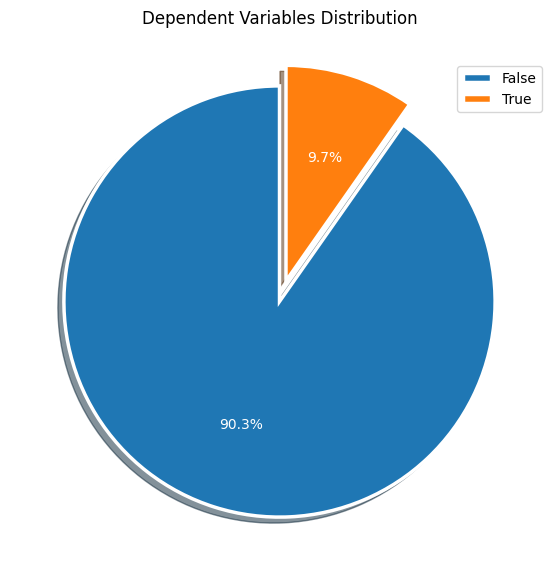

In [21]:
explode = (0, 0.1)
fig = plt.figure(figsize = (7, 7), facecolor='w')
out_df=pd.DataFrame(df.groupby('hazardous')['hazardous'].count())

patches, texts, autotexts = plt.pie(out_df['hazardous'], autopct='%1.1f%%',
                                    textprops={'color': "w"},
                                    explode=explode,
                                    startangle=90, shadow=True)

for patch in patches:
    patch.set_path_effects({path_effects.Stroke(linewidth=2.5,
                                                foreground='w')})

plt.legend(labels=['False','True'], bbox_to_anchor=(1., .95))
plt.title('Dependent Variables Distribution')
# plt.savefig('gender_pie')
plt.show()

As we can see from the pie chart, our dependent variables are imbalanced. Dealing with imbalanced datasets is a common challenge in machine learning. When your dependent variable classes are imbalanced, it can lead to biased models that perform poorly on the minority class. We are going to deal with it before training our Deep Neural Network (DNN) model.

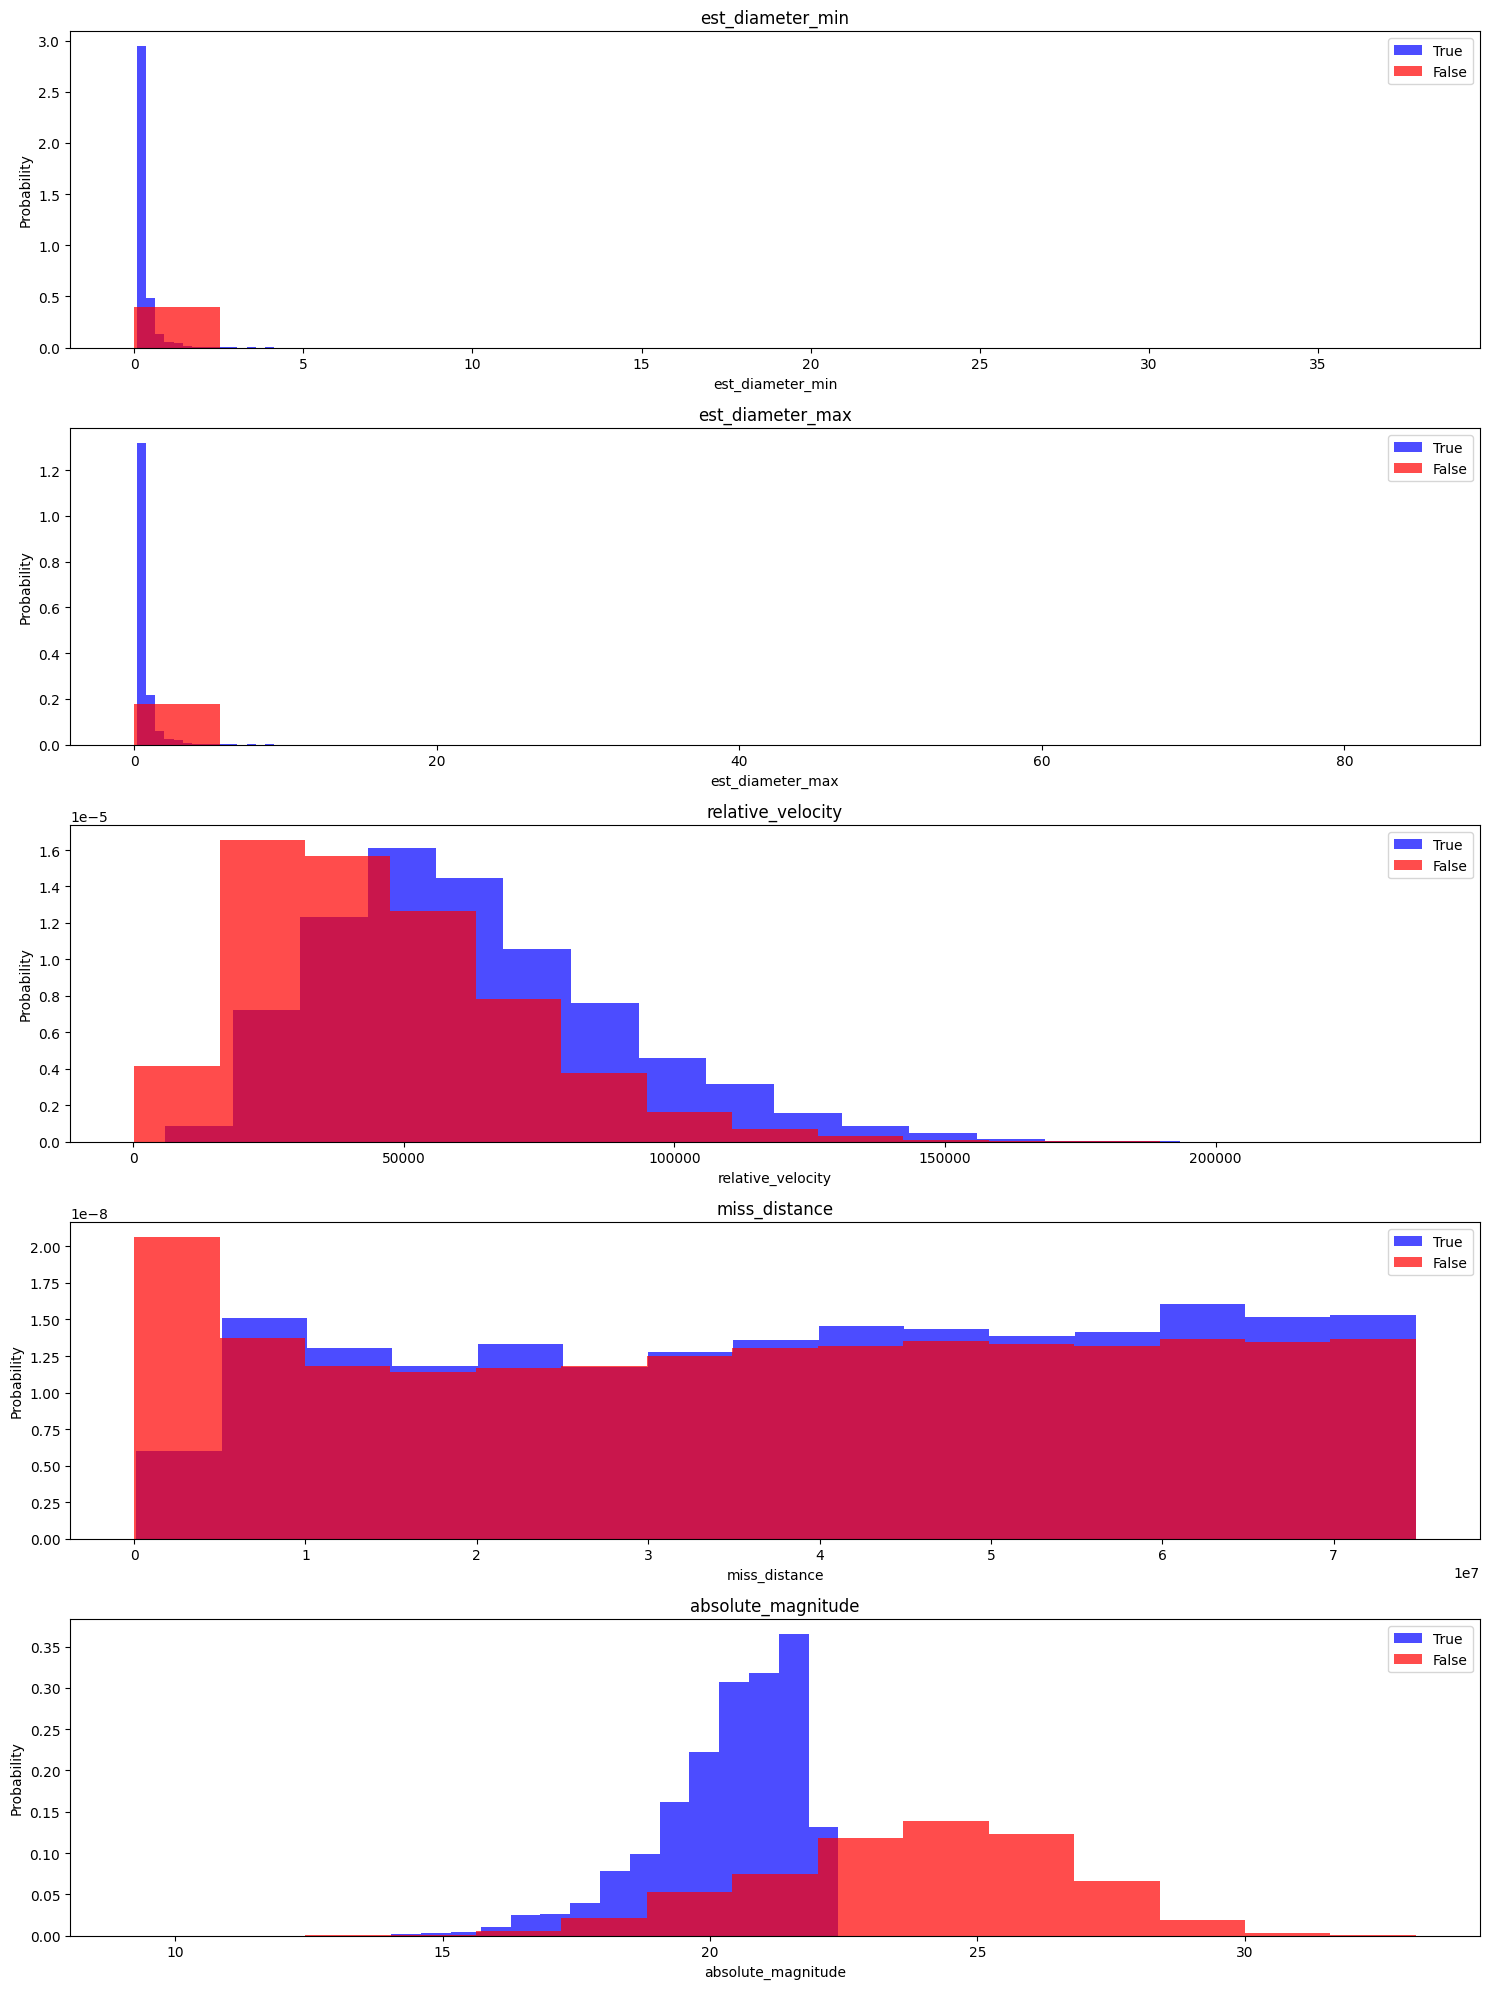

In [22]:
rows_to_plot = df.columns[:5]

plt.figure(figsize=(15, 20))
for i, label in enumerate(rows_to_plot, 1):
    plt.subplot(len(rows_to_plot), 1, i)
    plt.hist(df[df['hazardous'] == 1][label], color='blue', label="True", alpha=0.7, density=True, bins=15)
    plt.hist(df[df['hazardous'] == 0][label], color='red', label="False", alpha=0.7, density=True, bins=15)
    plt.title(label)
    plt.ylabel("Probability")
    plt.xlabel(label)
    plt.legend()

plt.tight_layout()
plt.show()

Creating correlation heatmap.

<Axes: title={'center': 'Correlation Heatmap'}>

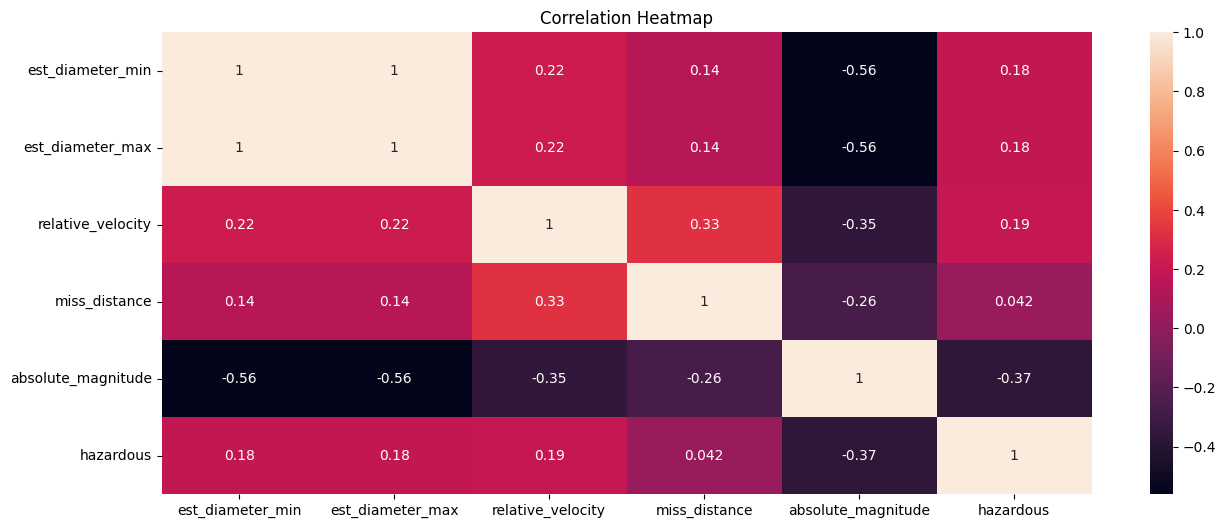

In [23]:
plt.figure(figsize = (15, 6))
plt.title('Correlation Heatmap')
sns.heatmap(df.corr(), annot = True)

### 2.5. Label encoding

<p> Building Label Encoding to handle categorical variables (for hazardous/label column).</p>

In [24]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
label_encoder.fit(df['hazardous'])
df['label'] = label_encoder.transform(df['hazardous'])
df['label'].unique()

array([0, 1])

Let's see what we have done;

In [25]:
df.head()

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous,label
0,1.198271,2.679415,13569.249224,5.483974e+07,16.73,False,0
1,0.265800,0.594347,73588.726663,6.143813e+07,20.00,True,1
2,0.722030,1.614507,114258.692129,4.979872e+07,17.83,False,0
3,0.096506,0.215794,24764.303138,2.543497e+07,22.20,False,0
4,0.255009,0.570217,42737.733765,4.627557e+07,20.09,True,1


We categorized the unique values in the hazardous column and transferred them to a different column named label.

### 2.6. Dealing with imbalanced dataset

There are several strategies you can use to address this issue before training your Deep Neural Network (DNN) model:

**Resampling**:

 - *Oversampling*: Increase the number of instances in the minority class by duplicating samples or generating synthetic data points.
 - *Undersampling*: Decrease the number of instances in the majority class by randomly removing some samples.

**Weighted Loss Function**:

Assign higher weights to the minority class during model training. This makes the model pay more attention to the minority class.

The resample function is then applied to the `minority_class`. This function duplicates samples from the minority class with replacement `(replace=True)` until it matches the number of samples in the majority class `(n_samples=len(majority_class))`. This effectively increases the representation of the minority class in the dataset.

In [26]:
minority_class = df[df['label'] == 1]
majority_class = df[df['label'] == 0]
minority_upsampled = resample(minority_class, replace=True, n_samples=len(majority_class), random_state=42)

The upsampled minority class, stored in minority_upsampled, is concatenated with the original majority class `(majority_class)` using pd.concat. This creates a new DataFrame called `balanced_df`, where both classes are balanced.

In [27]:
balanced_df = pd.concat([majority_class, minority_upsampled])

Shuffle the dataset.

In [28]:
balanced_df = balanced_df.sample(frac=1, random_state=42)
balanced_df.head()

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous,label
34801,0.069913,0.156329,68591.570858,1.186216e+07,22.90,False,0
40405,0.036691,0.082043,64069.623017,4.467340e+07,24.30,False,0
51575,0.477040,1.066694,74822.876347,1.321325e+07,18.73,True,1
84469,0.031373,0.070152,11016.075416,2.326070e+07,24.64,False,0
41382,0.160160,0.358129,19482.422892,5.235652e+07,21.10,False,0


In [29]:
balanced_df.shape

(163992, 7)

After these steps, `balanced_df` contains a balanced dataset with an equal number of samples for each class. This balanced dataset can be used for training machine learning models, such as your DNN, to mitigate the issues caused by class imbalance and potentially improve the model's performance on the minority class.

### 2.6. Determination of dependent and independent variables

<p>To build model and make prediction, we need to seperate our data as dependent and independent variables.

In [30]:
X = balanced_df.drop(["label", "hazardous"], axis = 1)
y = balanced_df["label"]

<b>Independent variables</b>

In [31]:
X

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude
34801,0.069913,0.156329,68591.570858,1.186216e+07,22.90
40405,0.036691,0.082043,64069.623017,4.467340e+07,24.30
51575,0.477040,1.066694,74822.876347,1.321325e+07,18.73
84469,0.031373,0.070152,11016.075416,2.326070e+07,24.64
41382,0.160160,0.358129,19482.422892,5.235652e+07,21.10
...,...,...,...,...,...
28097,0.121494,0.271669,61228.035266,7.419592e+07,21.70
6338,0.201630,0.450858,53077.570866,4.351202e+07,20.60
65169,0.121494,0.271669,32903.560475,2.869810e+07,21.70
6656,0.133216,0.297879,30220.078200,5.609021e+07,21.50


<b>Dependent variables</b>

In [32]:
y

34801    0
40405    0
51575    1
84469    0
41382    0
        ..
28097    1
6338     1
65169    1
6656     1
19552    1
Name: label, Length: 163992, dtype: int64

### 2.7. Splitting test and train

<p>The train-test split is a technique for evaluating the performance of a machine learning algorithm. Seperated %66.6 for train and %33.3 for test set.</p>

In [33]:
from sklearn.model_selection import train_test_split

x_train, x_temp, y_train, y_temp = train_test_split(X, y, test_size=0.33, random_state=0)
x_test, x_val, y_test, y_val = train_test_split(x_temp, y_temp, test_size=0.175, random_state=0)

In [34]:
print(x_train.shape, y_train.shape)

(109874, 5) (109874,)


In [35]:
print(x_val.shape, y_val.shape)

(9471, 5) (9471,)


In [36]:
print(x_test.shape, y_test.shape)

(44647, 5) (44647,)


### 2.8. Scaling datas

<p>This means that you're transforming your data so that it fits within a specific scale like 0-1.</p>

In [37]:
from sklearn.preprocessing import StandardScaler

In [38]:
sc = StandardScaler()

X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)
X_val = sc.transform(x_val)

<a id="ann"></a>

<h2 align=center><b>Building Artificial Neural Network Model for Classification</b></h2>

<p>Artificial neural networks, usually simply called neural networks or, more simply yet, neural nets, are computing systems. Artificial Neural Networks (ANNs) are computational models inspired by the structure and function of the human brain. They are a subset of machine learning and deep learning techniques. For more, please check <a href="https://en.wikipedia.org/wiki/Artificial_neural_network">Wikipedia</a>.</p>

We can directly import our model with keras function <code>load_model</code>.

### 3.1 Loading created model

In [39]:
# from keras.models import load_model
# model = load_model('model.h5')

### 3.2 Checking the architecture of the model

In [40]:
# model.summary()

### 3.3. Define neural network parameters

<p>We have 5 dependent variables and we want 12 epochs in our model.</p>

In [41]:
INPUT = X.shape[1]
epoch = 16 # @param {type:"integer"}
batch_size = 32 # @param {type:"integer"}

### 3.4. Building Deep Neural Network (DNN).

- **ANN (Artificial Neural Network)**: This is a broad term referring to any neural network model, including shallow networks (those with a single hidden layer) and deep networks (those with multiple hidden layers).

- **DNN (Deep Neural Network)**: This is a specific type of ANN characterized by having multiple hidden layers, making it deep. The model I provided in the code is an example of a DNN because it has multiple hidden layers (more than one hidden layer).

In [42]:
model = Sequential()

model.add(Dense(64, activation="relu", input_dim=INPUT))

model.add(Dense(32, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(16, activation="relu"))

model.add(Dense(1, activation="sigmoid"))

In [43]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [44]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                384       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 3009 (11.75 KB)
Trainable params: 3009 (11.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### 3.5. Training

<p>Let's fit and train our model.</p>

In [45]:
start = time.time()

model_history = model.fit(X_train, y_train, epochs=epoch, batch_size=batch_size, validation_data=(X_val, y_val))

end = time.time()
cal_time = end - start
print("\nTraining model for NASA - Nearest Earth Objects data set took {} seconds.".format(cal_time))

Epoch 1/16
3434/3434 [==============================] - 20s 5ms/step - loss: 0.3163 - accuracy: 0.8686 - val_loss: 0.3004 - val_accuracy: 0.8749
Epoch 2/16
3434/3434 [==============================] - 12s 3ms/step - loss: 0.3026 - accuracy: 0.8746 - val_loss: 0.3015 - val_accuracy: 0.8728
Epoch 3/16
3434/3434 [==============================] - 7s 2ms/step - loss: 0.3015 - accuracy: 0.8750 - val_loss: 0.3005 - val_accuracy: 0.8750
Epoch 4/16
3434/3434 [==============================] - 8s 2ms/step - loss: 0.3002 - accuracy: 0.8755 - val_loss: 0.2986 - val_accuracy: 0.8769
Epoch 5/16
3434/3434 [==============================] - 8s 2ms/step - loss: 0.3000 - accuracy: 0.8751 - val_loss: 0.2992 - val_accuracy: 0.8760
Epoch 6/16
3434/3434 [==============================] - 7s 2ms/step - loss: 0.2993 - accuracy: 0.8758 - val_loss: 0.3007 - val_accuracy: 0.8769
Epoch 7/16
3434/3434 [==============================] - 8s 2ms/step - loss: 0.2992 - accuracy: 0.8756 - val_loss: 0.2980 - val_accurac

### 3.6. Show summary and save model

<p>Let's save our model for further predictions and see summary of our model.</p>

In [46]:
model.save('model_dnn.h5') # @markdown Run for saving weights.
print("Model saved as 'model_dnn.h5'.")

Model saved as 'model_dnn.h5'.


### 3.7. Plot loss and accuracy

In [47]:
print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [48]:
def plot_accuracy_loss(training_results):
  plt.figure(figsize = (15, 6))
  plt.subplot(2, 1, 1)
  plt.plot(training_results.history['loss'], 'r')
  plt.ylabel('Loss')
  plt.title('Training loss iterations')
  plt.subplot(2, 1, 2)
  plt.plot(training_results.history['accuracy'])
  plt.ylabel('Accuracy')
  plt.xlabel('Epochs')
  plt.show()

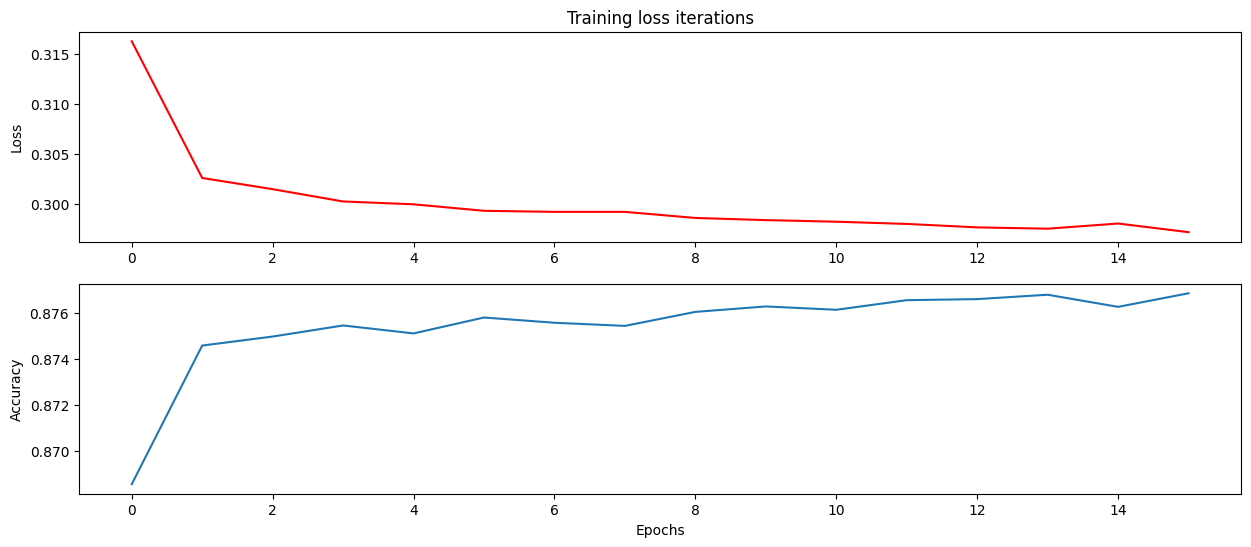

In [49]:
plot_accuracy_loss(model_history)

### 3.8. System success

A confusion matrix is a table used in machine learning and classification tasks to evaluate the performance of a predictive model. It provides a detailed breakdown of the model's predictions compared to the actual outcomes, allowing you to assess the model's accuracy, precision, recall, and other important metrics. A confusion matrix is especially useful in binary classification problems (where there are only two classes), but it can also be extended to multi-class problems.

In [50]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)  #  Comparing results
print("\nConfusion Matrix:\n", cm)

from sklearn.metrics import accuracy_score
print(f"\nAccuracy score: {accuracy_score(y_test, y_pred)}")

1396/1396 [==============================] - 4s 3ms/step

Confusion Matrix:
 [[17216  5117]
 [  277 22037]]

Accuracy score: 0.8791856115752458


**Precision**: The ratio of true positives to the total number of positive predictions TP / (TP + FP). It measures how many of the predicted positive cases were actually positive.
    
**Recall (Sensitivity or True Positive Rate)**: The ratio of true positives to the total number of actual positive cases TP / (TP + FN). It measures the model's ability to correctly identify all positive cases.
    
**Specificity (True Negative Rate)**: The ratio of true negatives to the total number of actual negative cases TN / (TN + FP). It measures the model's ability to correctly identify all negative cases.
    
**F1-Score**: The harmonic mean of precision and recall, which balances the trade-off between precision and recall.

In [52]:
true_positive = cm[1, 1]
false_positive = cm[0, 1]
true_negative = cm[0, 0]
false_negative = cm[1, 0]

precision = true_positive / (true_positive + false_positive)
recall = true_positive / (true_positive + false_negative)
specificity = true_negative / (true_negative + false_positive)
f1 = 2 * (precision * recall) / (precision + recall)

In [55]:
print("Precision:", precision)
print("Recall:", recall)
print("Specificity:", specificity)
print("F1 Score:", f1)

Precision: 0.8115563084628415
Recall: 0.9875862687102268
Specificity: 0.7708771772713026
F1 Score: 0.8909598124039784


<a id="conclusion"></a>

<h2 align=center><b>Conclusion</b></h2>

The binary classification model trained to predict whether Near-Earth Objects (NEOs) are hazardous or not has yielded promising results. The evaluation metrics reveal the following key insights:

-   **Accuracy**: The model achieved an accuracy score of approximately 87.92%, indicating that it correctly classified a significant portion of NEOs.
    
-   **Precision**: With a precision score of approximately 81.16%, the model demonstrates its ability to identify hazardous NEOs with a relatively low rate of false positives. This is essential for ensuring that resources are appropriately allocated to address potential threats.
    
-   **Recall**: The recall score, measuring around 98.76%, signifies the model's effectiveness in capturing a vast majority of actual hazardous NEOs. It minimizes the risk of failing to detect dangerous objects.
    
-   **Specificity**: The specificity score of approximately 77.09% reflects the model's capability to correctly identify non-hazardous NEOs. This is crucial for preventing unnecessary alarm or resource allocation for harmless objects.
    
-   **F1 Score**: The F1 score, which combines precision and recall, stands at approximately 89.10%. This balanced metric highlights the model's ability to strike a compromise between minimizing false alarms and ensuring high detection rates.

<br>

In summary, the classification model, leveraging Artificial Neural Networks (ANNs), demonstrates a solid performance in identifying hazardous Near-Earth Objects. Its accuracy, precision, and recall indicate its potential utility in early detection and tracking efforts, contributing to the ongoing mission of safeguarding our planet from potential impacts.

<h2>Contact Me</h2>

<p>If you have something to say to me please contact me:</p>

<ul>
 <li>Twitter: <a href="https://twitter.com/Doguilmak">Doguilmak</a></li>
 <li>Mail address: doguilmak@gmail.com</li>
</ul>

In [51]:
from datetime import datetime
print(f"Changes have been made to the project on {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")

Changes have been made to the project on 2023-09-18 09:51:57
